In [1]:
# Importing the important modules
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Creating constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
# Load the data from the data directory to the jupyter notebook using the API - tf.keras.preprocessing.image_dataset_from_directory()
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [4]:
# Available classes in the dataset
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# Length of dataset
len(dataset)

68

In [6]:
# Finding image details and the types of images available in one batch
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch)

(32, 256, 256, 3)
tf.Tensor([0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 2 1 2 0 0 2 1 1 1 1 1 0 0 2 0 1], shape=(32,), dtype=int32)


In [7]:
# converting tensor to numpy
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 1 0 2 1 1 1 0 0 0 0 0 0 1 0 0 0 1 2 2 1 1 0 0 1 0 1 0 1 0 1 1]


In [8]:
# Printing the first image
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[193. 184. 187.]
  [184. 175. 178.]
  [179. 170. 173.]
  ...
  [157. 147. 156.]
  [156. 146. 155.]
  [155. 145. 154.]]

 [[184. 175. 178.]
  [178. 169. 172.]
  [176. 167. 170.]
  ...
  [165. 155. 164.]
  [161. 151. 160.]
  [156. 146. 155.]]

 [[180. 171. 174.]
  [176. 167. 170.]
  [177. 168. 171.]
  ...
  [165. 155. 164.]
  [157. 147. 156.]
  [150. 140. 149.]]

 ...

 [[132. 113. 119.]
  [126. 107. 113.]
  [119. 100. 106.]
  ...
  [103.  83.  92.]
  [116.  96. 105.]
  [124. 104. 113.]]

 [[138. 119. 125.]
  [131. 112. 118.]
  [128. 109. 115.]
  ...
  [119.  99. 108.]
  [119.  99. 108.]
  [117.  97. 106.]]

 [[139. 120. 126.]
  [133. 114. 120.]
  [133. 114. 120.]
  ...
  [117.  97. 106.]
  [133. 113. 122.]
  [126. 106. 115.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
# Converting the tensor of first image to 3D array
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[ 95.  86. 103.]
  [ 98.  89. 106.]
  [103.  94. 111.]
  ...
  [116. 107. 124.]
  [115. 106. 123.]
  [112. 103. 120.]]

 [[ 98.  89. 106.]
  [100.  91. 108.]
  [103.  94. 111.]
  ...
  [111. 102. 119.]
  [109. 100. 117.]
  [105.  96. 113.]]

 [[105.  96. 113.]
  [106.  97. 114.]
  [107.  98. 115.]
  ...
  [111. 102. 119.]
  [108.  99. 116.]
  [105.  96. 113.]]

 ...

 [[159. 148. 162.]
  [159. 148. 162.]
  [157. 146. 160.]
  ...
  [151. 143. 158.]
  [152. 144. 159.]
  [152. 144. 159.]]

 [[162. 151. 165.]
  [161. 150. 164.]
  [158. 147. 161.]
  ...
  [153. 145. 160.]
  [153. 145. 160.]
  [152. 144. 159.]]

 [[164. 153. 167.]
  [162. 151. 165.]
  [159. 148. 162.]
  ...
  [158. 150. 165.]
  [158. 150. 165.]
  [157. 149. 164.]]]


In [10]:
# Details of first image
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


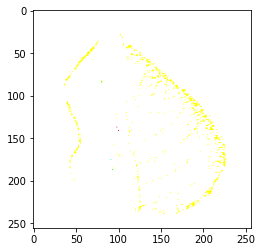

In [11]:
# Visualize the first image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy())

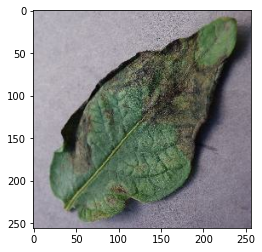

In [12]:
# Visualize the first image after converting the array values to integer
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))

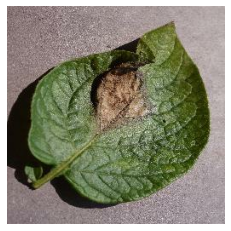

In [13]:
# Remove the axis from the image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

In [14]:
for image_batch,label_batch in dataset.take(1):
    print(label_batch[0])
    print(class_names[label_batch[0]])

tf.Tensor(0, shape=(), dtype=int32)
Potato___Early_blight


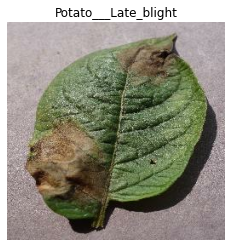

In [15]:
# Providing title to the image
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(class_names[label_batch[0]])

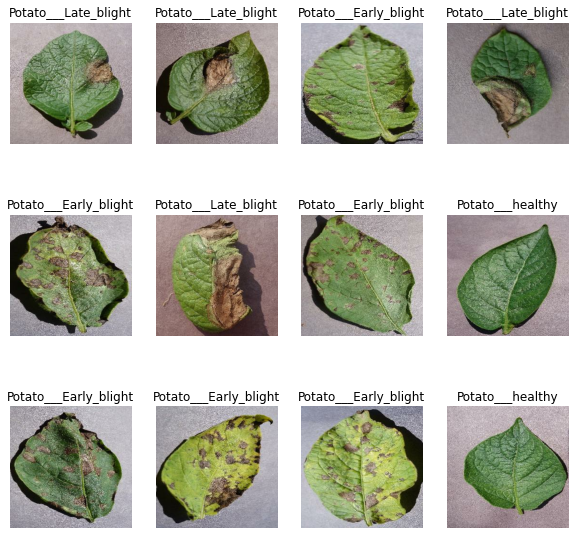

In [16]:
# printing 12 images out of 32 images (one batch)
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[label_batch[i]])

# Split the data into train and test split
* 80% data ==> training
* 20% data ==> 10% data ==> validation, 10% data ==> test

In [17]:
# Train dataset
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [18]:
# Train dataset
train_ds = dataset.take(54)
len(train_ds)

54

In [19]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [20]:
# Validation dataset
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [21]:
# Validation dataset
val_ds = test_ds.take(6)
len(val_ds)

6

In [22]:
# Test dataset
test_ds = test_ds.skip(6)
len(test_ds)

8

In [23]:
# Creating a function to split the data into train, validation and test dataset
def get_dataset_partition_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [24]:
# Calling the function - get_dataset_partition_tf
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [25]:
# Length of training data
len(train_ds)

54

In [26]:
# Length of validation data
len(val_ds)

6

In [27]:
# Length of test data
len(test_ds)

8

In [28]:
# Using cache and prefetch
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Preprocessing

In [29]:
# Resize and rescale
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [30]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Model Building
* Using Convolutional Neural Network (CNN)

In [31]:
# Defining some constants
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [32]:
# Defining model architecture
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = "relu", input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(n_classes, activation = "softmax"),
])

model.build(input_shape = input_shape)

In [33]:
# Printing the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [34]:
# Compiling the model by defining suitable optimizer, loss function and the metric
model.compile(
   optimizer = "adam",
   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
   metrics = ["accuracy"]
)

In [35]:
# Model training on train and validation data
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 [==============================] - 62s 1s/step - loss: 0.9039 - accuracy: 0.4977 - val_loss: 0.8458 - val_accuracy: 0.4792
Epoch 2/50
54/54 [==============================] - 56s 1s/step - loss: 0.7418 - accuracy: 0.6198 - val_loss: 0.6929 - val_accuracy: 0.6823
Epoch 3/50
54/54 [==============================] - 56s 1s/step - loss: 0.4975 - accuracy: 0.7731 - val_loss: 0.5790 - val_accuracy: 0.7552
Epoch 4/50
54/54 [==============================] - 55s 1s/step - loss: 0.5380 - accuracy: 0.7546 - val_loss: 0.4028 - val_accuracy: 0.8385
Epoch 5/50
54/54 [==============================] - 56s 1s/step - loss: 0.4944 - accuracy: 0.7859 - val_loss: 0.2972 - val_accuracy: 0.9062
Epoch 6/50
54/54 [==============================] - 55s 1s/step - loss: 0.3176 - accuracy: 0.8600 - val_loss: 0.2686 - val_accuracy: 0.8906
Epoch 7/50
54/54 [==============================] - 56s 1s/step - loss: 0.2677 - accuracy: 0.8958 - val_loss: 0.1652 - val_accuracy: 0.9323
Epoch 8/50
54/54 [==

In [36]:
# Model evaluation on the test data
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 208ms/step - loss: 0.2514 - accuracy: 0.9219


In [37]:
# Model evaluation output provides loss and accuracy values in a list
scores

[0.25139686465263367, 0.921875]

# Saving the history of each and every epoch

In [38]:
history

In [39]:
# Parameters in the epochs performed
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [40]:
# Parameters/keys display in each epoch
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
# Displaying the accuracy value at every epoch in a list
history.history["accuracy"]

[0.49768519401550293,
 0.6197916865348816,
 0.7731481194496155,
 0.7546296119689941,
 0.7858796119689941,
 0.8599537014961243,
 0.8958333134651184,
 0.9415509104728699,
 0.9560185074806213,
 0.9375,
 0.9166666865348816,
 0.9606481194496155,
 0.9704861044883728,
 0.9762731194496155,
 0.9849537014961243,
 0.9733796119689941,
 0.9722222089767456,
 0.9791666865348816,
 0.9756944179534912,
 0.9918981194496155,
 0.9913194179534912,
 0.9855324029922485,
 0.9832175970077515,
 0.9814814925193787,
 0.9884259104728699,
 0.9976851940155029,
 0.9751157164573669,
 0.9895833134651184,
 0.9837962985038757,
 0.9699074029922485,
 0.9803240895271301,
 0.9768518805503845,
 0.9918981194496155,
 0.9924768805503845,
 0.9861111044883728,
 0.9878472089767456,
 0.9837962985038757,
 0.9890046119689941,
 0.9571759104728699,
 0.9907407164573669,
 0.9785879850387573,
 0.9913194179534912,
 0.9965277910232544,
 0.9930555820465088,
 0.9976851940155029,
 0.9675925970077515,
 0.9959490895271301,
 0.9895833134651184,
 0.

In [42]:
# How many values of accuracy are available(equal to the number of epochs)
len(history.history["accuracy"])

50

In [43]:
# Saving the parameter value into some constant for using it while plotting
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

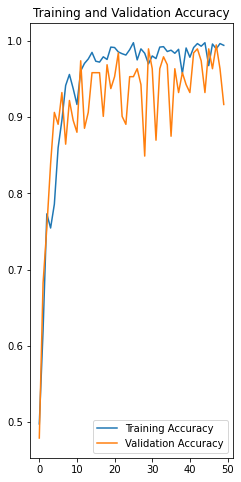

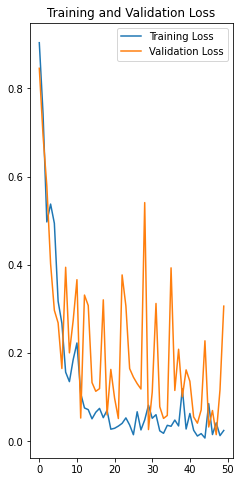

In [44]:
# Plotting accuracy and validation accuracy
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

# Plotting loss and validation loss
plt.figure(figsize = (8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = "Training Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc = "upper right")
plt.title("Training and Validation Loss")
plt.show()

# Prediction

First image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 311ms/step
batch_prediction[0]: [9.9999988e-01 1.4420714e-07 1.2695102e-13]
predicted label: Potato___Early_blight


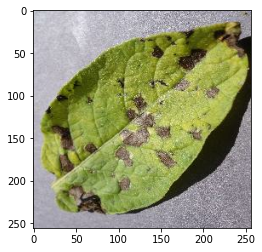

In [45]:
# Displaying prediction for the first image of the batch
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("actual label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("batch_prediction[0]:",batch_prediction[0])
    print("predicted label:", class_names[np.argmax(batch_prediction[0])])

In [46]:
# Defining a function for prediction on the entire batch of images
def predict(model,img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [47]:
# 100% confidence means the accuracy of prediction is 100%

1/1 [==============================] - 0s 16ms/step


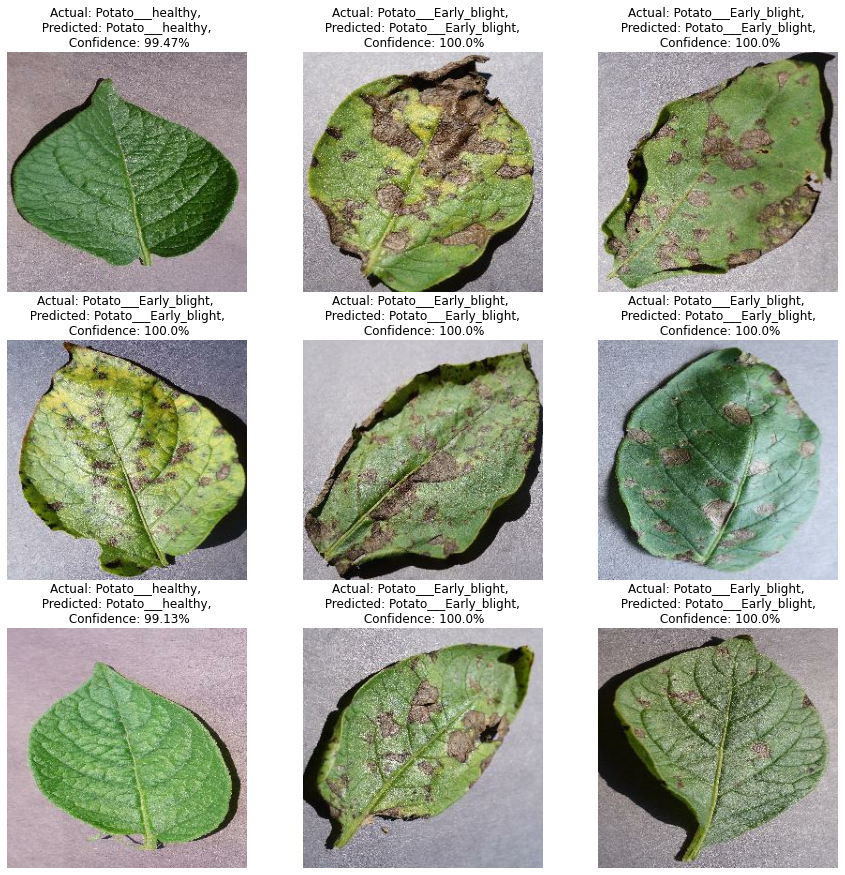

In [48]:
# Calling the function and dispalying prediction for the first nine images of the batch
plt.figure(figsize = (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        
        plt.axis("off")

In [49]:
# Saving the model in the "model" directory
model_version = 1
model.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


# Saving the model with automatic incrementation of the model version
* Using os module

In [50]:
# Displaying the number of directories available in the folder "models"
#import os
#os.listdir("models")

In [51]:
# Converting string to integer
#[int(i) for i in os.listdir("models")]

In [52]:
# Adding anything to a list
#[int(i) for i in os.listdir("models") + [0]]

In [53]:
# Finding the next model_version
#max([int(i) for i in os.listdir("models") + [0]])+1

In [54]:
# Automatic increment the model version and save the model in the mentioned directory
"""import os
model_version = max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")"""

'import os\nmodel_version = max([int(i) for i in os.listdir("models") + [0]])+1\nmodel.save(f"models/{model_version}")'